# Color Temperature Kelvin to RGB

<img src="figs/color_temp_chart.png">

The white point occurs at 6500-6600 K, which is perfect for photo manipulation purposes on a modern LCD monitor.

<img src="figs/Raw_temperature_vs_RGB_chart.png">

From the above figure, it’s easy to note that there are a few floors and ceilings that make our algorithm easier. Specifically:

- Red values below 6600 K are always 255

- Blue values below 2000 K are always 0

- Blue values above 6500 K are always 255

It’s also important to note that for purposes of fitting a curve to the data, green is best treated as two separate curves - one for temperatures below 6600 K, and a separate one for temperatures above that point.

## Function to get conversion matrix 

In [1]:
"""
    Based on: http://www.tannerhelland.com/4435/convert-temperature-rgb-algorithm-code/
    Comments resceived: https://gist.github.com/petrklus/b1f427accdf7438606a6
    Original pseudo code:
    
    Set Temperature = Temperature \ 100
    
    Calculate Red:
    If Temperature <= 66 Then
        Red = 255
    Else
        Red = Temperature - 60
        Red = 329.698727446 * (Red ^ -0.1332047592)
        If Red < 0 Then Red = 0
        If Red > 255 Then Red = 255
    End If
    
    Calculate Green:
    If Temperature <= 66 Then
        Green = Temperature
        Green = 99.4708025861 * Ln(Green) - 161.1195681661
        If Green < 0 Then Green = 0
        If Green > 255 Then Green = 255
    Else
        Green = Temperature - 60
        Green = 288.1221695283 * (Green ^ -0.0755148492)
        If Green < 0 Then Green = 0
        If Green > 255 Then Green = 255
    End If
    
    Calculate Blue:
    If Temperature >= 66 Then
        Blue = 255
    Else
        If Temperature <= 19 Then
            Blue = 0
        Else
            Blue = Temperature - 10
            Blue = 138.5177312231 * Ln(Blue) - 305.0447927307
            If Blue < 0 Then Blue = 0
            If Blue > 255 Then Blue = 255
        End If
    End If
"""

import math

def convert_K_to_RGB(colour_temperature):
    """
    Converts from K to RGB, algorithm courtesy of 
    http://www.tannerhelland.com/4435/convert-temperature-rgb-algorithm-code/
    """
    #range check
    if colour_temperature < 1000: 
        colour_temperature = 1000
    elif colour_temperature > 40000:
        colour_temperature = 40000
    
    tmp_internal = colour_temperature / 100.0
    
    # red 
    if tmp_internal <= 66:
        red = 255
    else:
        tmp_red = 329.698727446 * math.pow(tmp_internal - 60, -0.1332047592)
        if tmp_red < 0:
            red = 0
        elif tmp_red > 255:
            red = 255
        else:
            red = tmp_red
    
    # green
    if tmp_internal <=66:
        tmp_green = 99.4708025861 * math.log(tmp_internal) - 161.1195681661
        if tmp_green < 0:
            green = 0
        elif tmp_green > 255:
            green = 255
        else:
            green = tmp_green
    else:
        tmp_green = 288.1221695283 * math.pow(tmp_internal - 60, -0.0755148492)
        if tmp_green < 0:
            green = 0
        elif tmp_green > 255:
            green = 255
        else:
            green = tmp_green
    
    # blue
    if tmp_internal >=66:
        blue = 255
    elif tmp_internal <= 19:
        blue = 0
    else:
        tmp_blue = 138.5177312231 * math.log(tmp_internal - 10) - 305.0447927307
        if tmp_blue < 0:
            blue = 0
        elif tmp_blue > 255:
            blue = 255
        else:
            blue = tmp_blue
    
    return red, green, blue

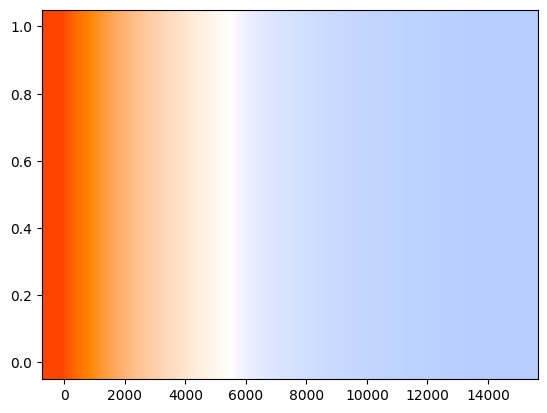

In [4]:
from matplotlib import pyplot as plt

step_size = 100
for i in range(0, 15000, step_size):
    color = list(map(lambda div: div/255.0, convert_K_to_RGB(i))) + [1]    
    plt.plot((i, i), (0, 1), linewidth=step_size/2.0, linestyle="-", color=color)

plt.show()

## Image transformation with color temperature conversion matrix

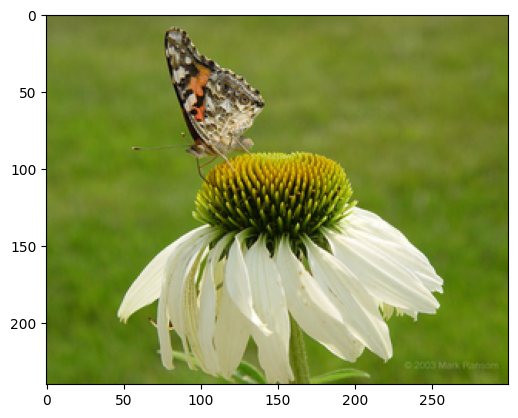

In [30]:
from PIL import Image

img = Image.open("figs/Ahtqr.png")
plt.imshow(img)

The function `convert_K_to_RGB()` returns a tuple of (R, G, B), whose element value is in the range of (0, 255).

In [41]:
temp = convert_K_to_RGB(2000)
print(temp)

(255, 136.86832541739756, 13.904070298965905)


While providing conversion matrix to `mage.convert()` function. For RGB color image, the matrix should be 12-tuple containing floating point values. The value range is [0, 1].

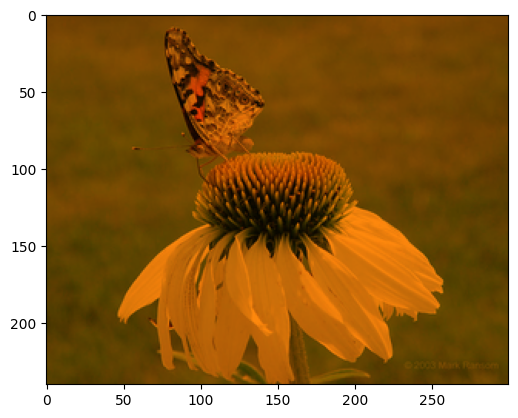

In [42]:
temp_matrix = (temp[0]/255.0, 0.0, 0.0, 0.0,
         0.0, temp[1]/255.0, 0.0, 0.0,
         0.0, 0.0, temp[2]/255.0, 0.0)
img1 = img.convert('RGB', temp_matrix)
plt.imshow(img1)

## References

[How to Convert Temperature (K) to RGB: Algorithm and Sample Code](https://tannerhelland.com/2012/09/18/convert-temperature-rgb-algorithm-code.html)